# Key tasks:
1. Load and visualize sample images
2. Check class distribution
3. load train and test data
4. Basic statistics about the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from PIL import Image

In [2]:
def load_data(path, save_path):
    # Get the current working directory
    current_dir = os.getcwd()
    print(f"Current working directory: {current_dir}")
    
    # Construct the full path
    data_path = os.path.join(os.path.dirname(current_dir), path)
    print(f"Loading data from: {data_path}")
    
    # Check if path exists
    if not os.path.exists(data_path):
        print(f"Error: Path does not exist: {data_path}")
        return None

    data = {}
    image_extensions = (".png", ".jpg", ".jpeg", ".bmp", ".gif")
    
    for folder in os.listdir(data_path):
        print(f"\nProcessing {folder}...")
        folder_path = os.path.join(data_path, folder)
        
        # Skip non-directories
        if not os.path.isdir(folder_path):
            print(f"Skipping {folder}: not a directory")
            continue
        
        # Create new list for each folder
        images = []
        
        # Get list of files
        files = [f for f in os.listdir(folder_path) if f.lower().endswith(image_extensions)]
        print(f"Found {len(files)} images in {folder}")
        
        # Process images (store file paths)
        for file in files:
            img_path = os.path.join(folder_path, file)
            try:
                with Image.open(img_path) as img:
                    # Store file path
                    images.append(img_path) 
                    print(f"Processed {file}")
            except Exception as e:
                print(f"Error loading {file}: {e}")

        data[folder] = images
        print(f"Stored {len(data[folder])} images for {folder}")

    if data:
        try:
            with open(save_path, "wb") as f:
                pickle.dump(data, f)
            print(f"Data saved to {save_path}")
        except Exception as e:
            print(f"Error saving data to {save_path}: {e}")

    return data

# Load the data
train_data = load_data("Data/ISIC84by84/Train", save_path = "../Data/processed_train_data.pkl")
test_data = load_data("Data/ISIC84by84/Test", save_path = "../Data/processed_test_data.pkl")

Current working directory: /home/mandes/skin_cancer/CS4486_project/Preprocessing
Loading data from: /home/mandes/skin_cancer/CS4486_project/Data/ISIC84by84/Train

Processing AK...
Found 735 images in AK
Processed ISIC_0070302.jpg
Processed ISIC_0064811.jpg
Processed ISIC_0064322.jpg
Processed ISIC_0065661.jpg
Processed ISIC_0070999.jpg
Processed ISIC_0056005.jpg
Processed ISIC_0063175.jpg
Processed ISIC_0070643.jpg
Processed ISIC_0061947.jpg
Processed ISIC_0024763.jpg
Processed ISIC_0070981.jpg
Processed ISIC_0054687.jpg
Processed ISIC_0071669.jpg
Processed ISIC_0057052.jpg
Processed ISIC_0070895.jpg
Processed ISIC_0025803.jpg
Processed ISIC_0027950.jpg
Processed ISIC_0060157.jpg
Processed ISIC_0072854.jpg
Processed ISIC_0070486.jpg
Processed ISIC_0067297.jpg
Processed ISIC_0058762.jpg
Processed ISIC_0069352.jpg
Processed ISIC_0066272.jpg
Processed ISIC_0030586.jpg
Processed ISIC_0061730.jpg
Processed ISIC_0066509.jpg
Processed ISIC_0061376.jpg
Processed ISIC_0065095.jpg
Processed ISIC

In [3]:
for folder in train_data:
    print(f"Number of images in {folder}: {len(train_data[folder])}")


Number of images in AK: 735
Number of images in SCC: 528
Number of images in MEL: 4422
Number of images in NV: 12775
Number of images in VASC: 153
Number of images in BKL: 2524
Number of images in BCC: 3223
Number of images in DF: 139


In [5]:
for folder in test_data:
    print(f"Number of images in {folder}: {len(test_data[folder])}")

Number of images in AK: 100
Number of images in SCC: 100
Number of images in MEL: 100
Number of images in NV: 100
Number of images in VASC: 100
Number of images in BKL: 100
Number of images in BCC: 100
Number of images in DF: 100


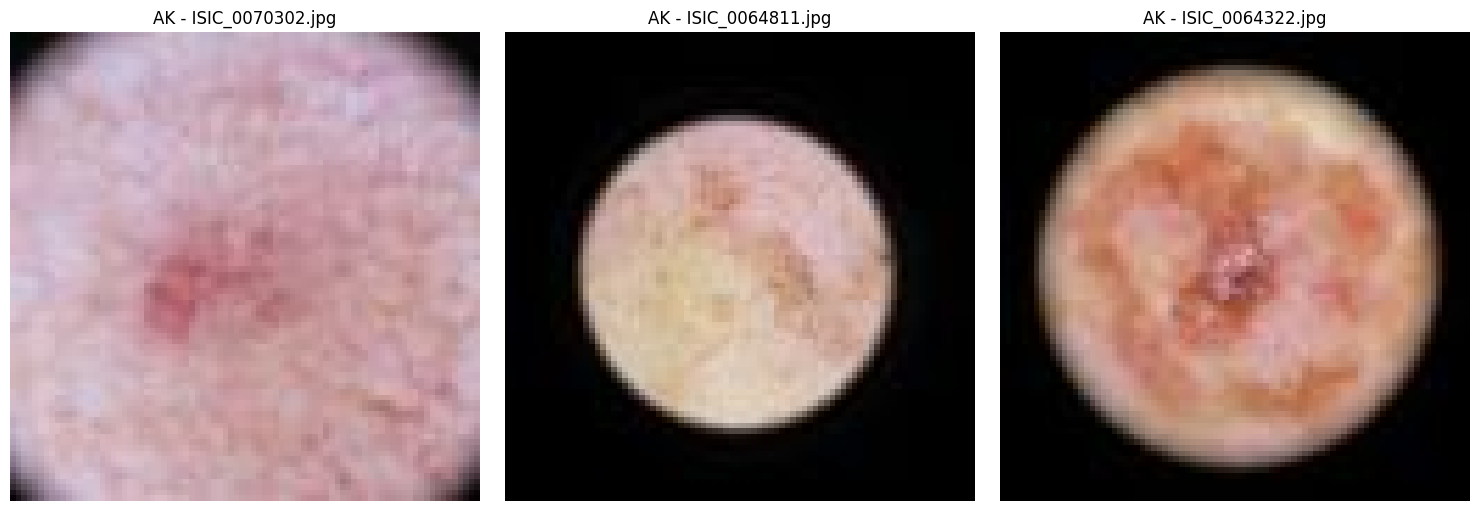

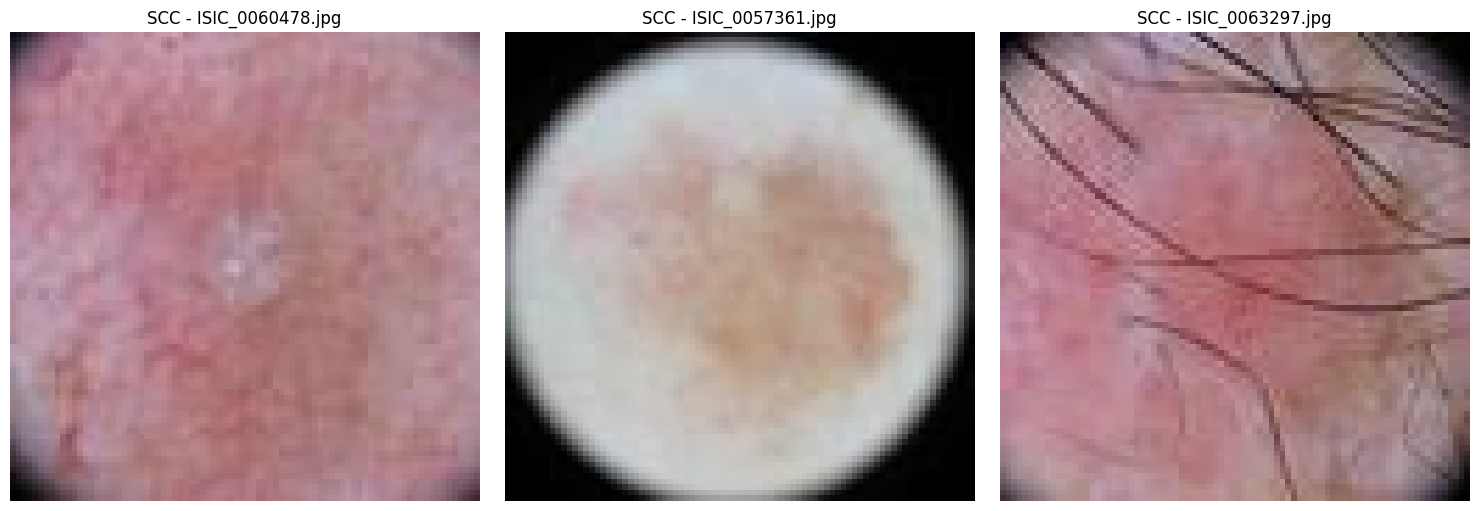

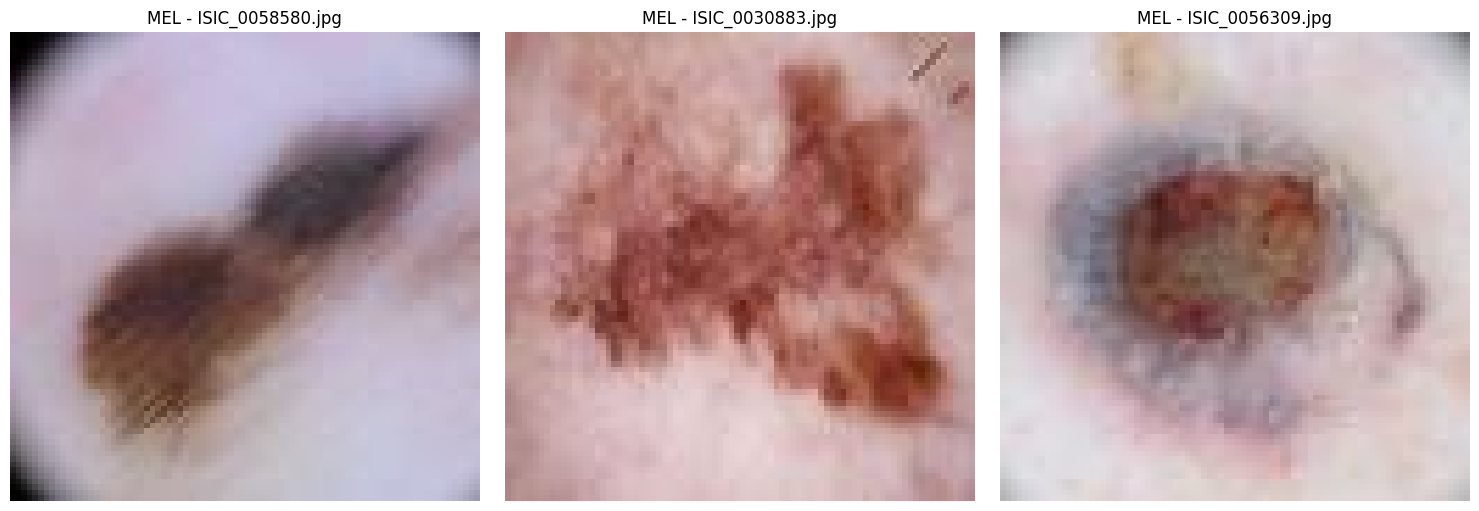

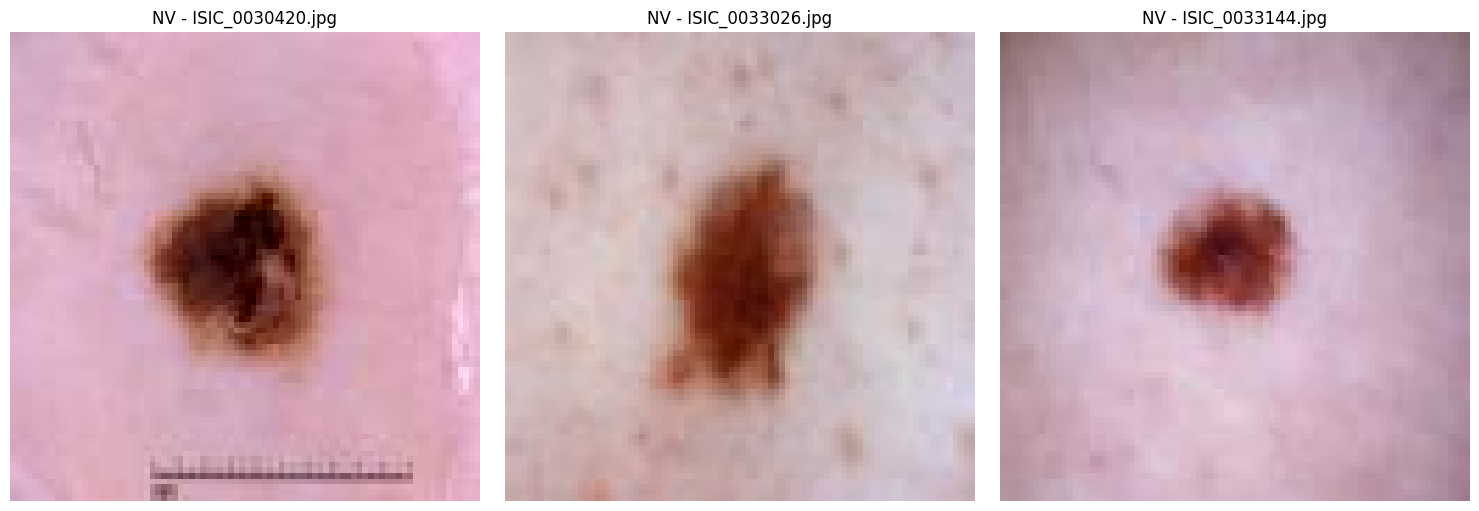

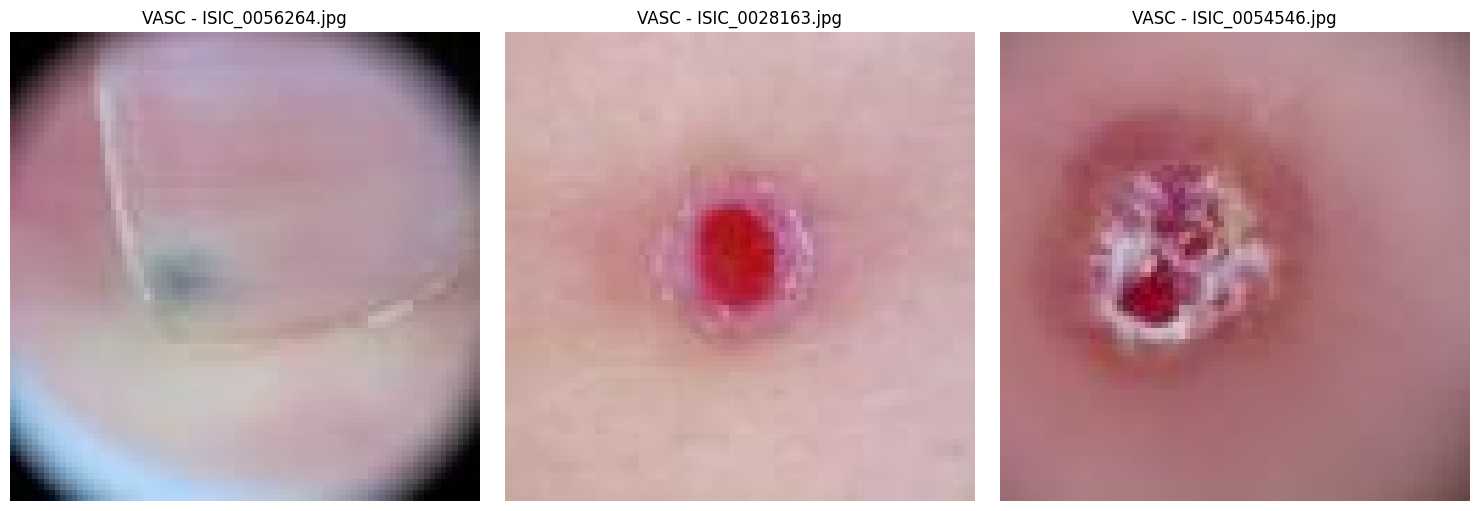

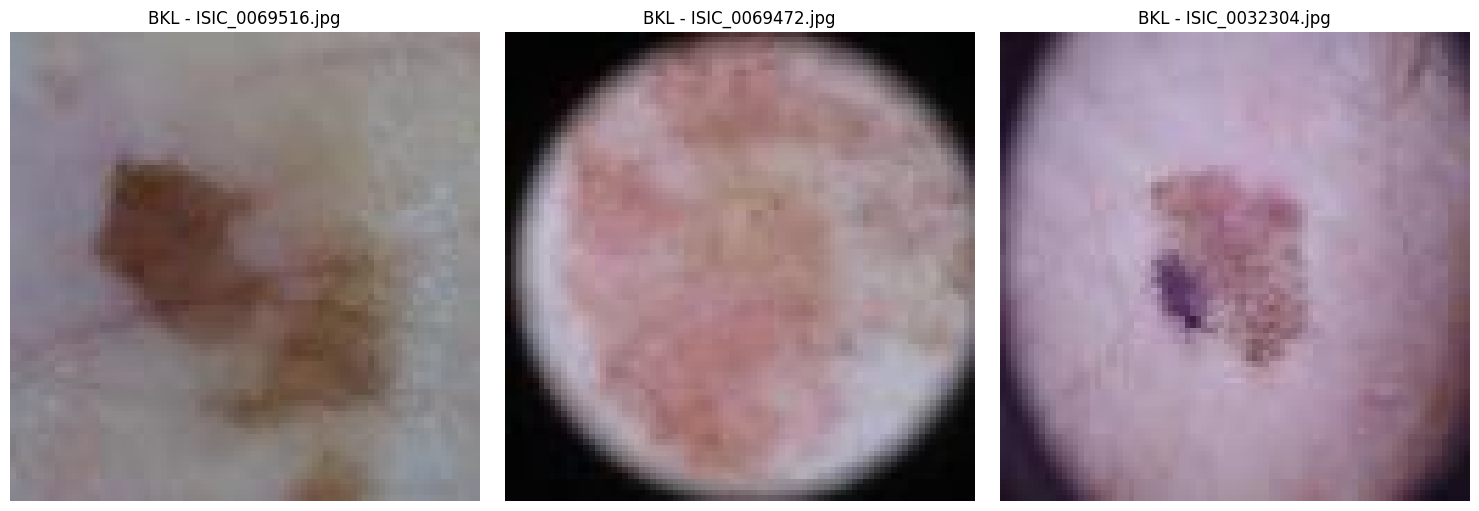

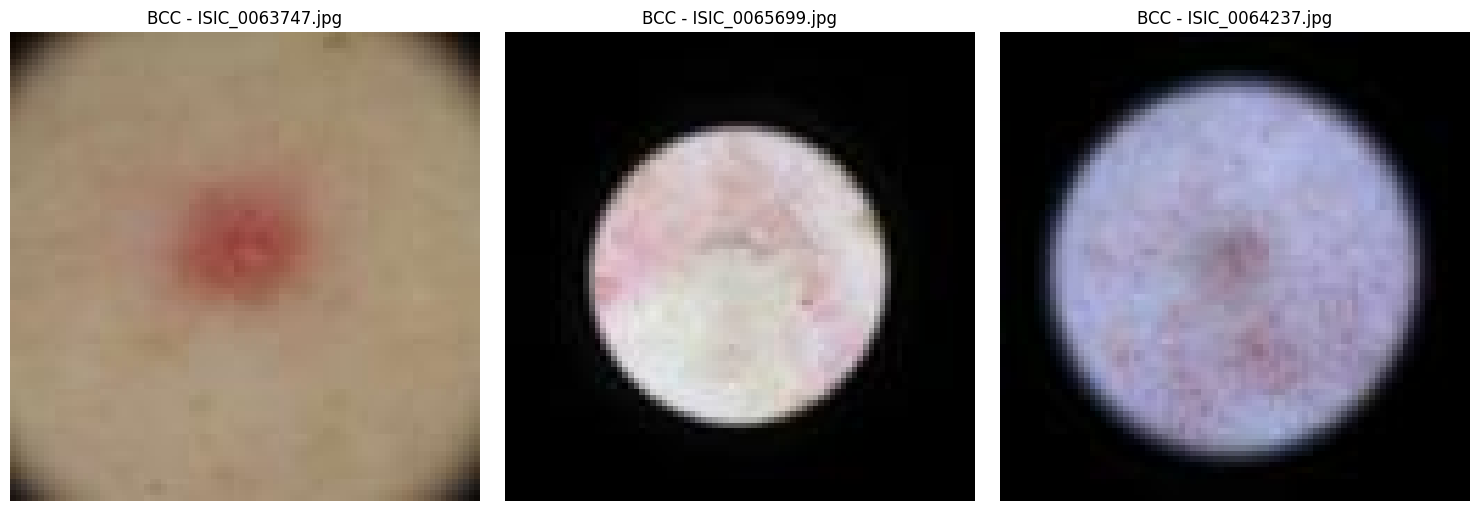

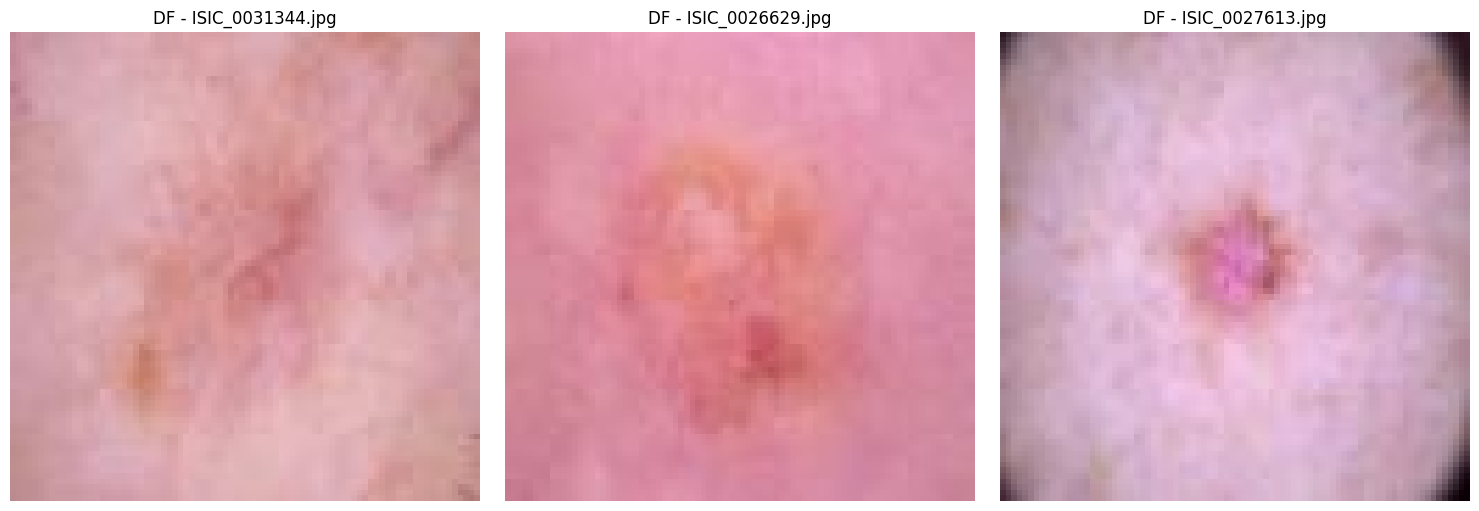

In [6]:
def display_images(data):
    for folder in data:
        image_paths = data[folder]
        if not image_paths:  # Skip empty folders
            print(f"No images in folder {folder}")
            continue
        
        # Create a figure for the folder
        plt.figure(figsize=(15, 5))
        for i, img_path in enumerate(image_paths[:3]):  # Display first 3 images
            plt.subplot(1, 3, i+1)
            try:
                with Image.open(img_path) as img:  # Reopen image
                    img_array = np.asarray(img)  # Convert to NumPy array
                    plt.imshow(img_array)
                    plt.title(f"{folder} - {os.path.basename(img_path)}")
                    plt.axis("off")
            except Exception as e:
                print(f"Error displaying image {img_path} in {folder}: {e}")
                plt.axis("off")  # Hide empty subplot
        plt.tight_layout()
        plt.show()


display_images(train_data)

In [7]:
# Get the image size
img_path= train_data["AK"][0]
img = Image.open(img_path)
width, height = img.size
print(f"Image: {img_path}")
print(f"Size: {width}x{height}")
x, y = 10, 10
pixel = img.getpixel((x, y))  # Returns (R, G, B) tuple for RGB
print(f"Pixel at ({x}, {y}): {pixel}")

Image: /home/mandes/skin_cancer/CS4486_project/Data/ISIC84by84/Train/AK/ISIC_0070302.jpg
Size: 84x84
Pixel at (10, 10): (188, 165, 183)
